In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from scipy.special import expit

2024-08-06 22:30:28.588262: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 22:30:28.590989: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 22:30:28.598123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 22:30:28.609229: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 22:30:28.612430: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 22:30:28.621983: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Loads mnist data into variables

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Pixel values by default are [0,255] (where 0 is black and 255 is white)
# We normalize these values for better compatibility with my model
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

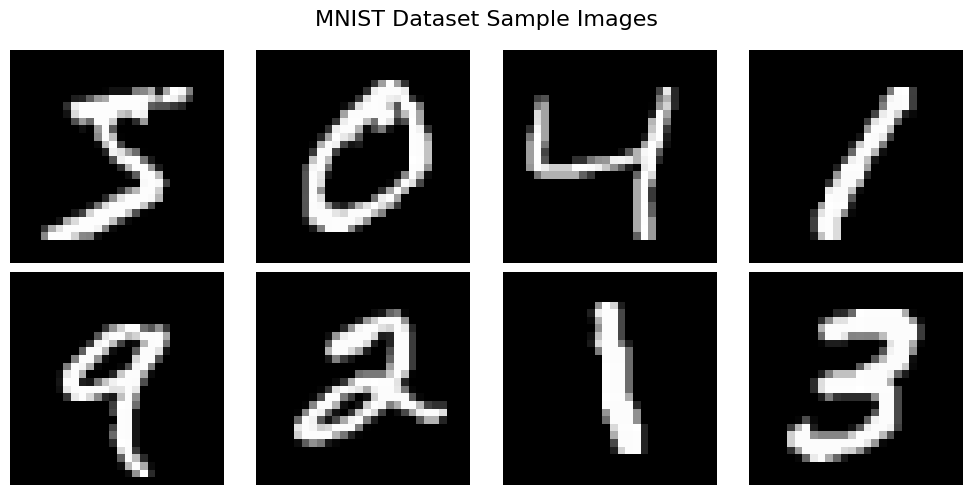

In [5]:
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(10, 5))

# Commented code shows first 8 images (indices 0-7)

# for i in range(rows):
#     for j in range(cols):
#         index = j + (cols * i)
#         axes[i, j].imshow(train_images[index], cmap='gray')
#         axes[i, j].axis('off')


# Show 8 random images in the dataset
for i in range(rows):
    for j in range(cols):
        index = np.random.randint(0, train_images.shape[0] - 1)
        axes[i, j].imshow(train_images[index], cmap='gray')
        axes[i, j].axis('off')

fig.suptitle("MNIST Dataset Sample Images", fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
n1Size = 784
n2Size = 16
n3Size = 16
n4Size = 10


# The following pieces of code initialize and fill 2d arrays which contain random numbers disttributed normally
# 2d array sizes vary based on the layer l1.shape = (784, 16) because there are 784 neurons in layer one and they all connect to 16 neurons in layer 2
# l2.shape = (16, 16) etc, etc.

l1Weights = np.array([])

for i in range(n1Size):
    temp = np.array([])
    for j in range(n2Size):
        # temp is an array of weights from ith neuron to all 16 neurons in the second layer
        temp = np.append(temp, np.random.normal(loc=0, scale=1))
    if l1Weights.size == 0:
        l1Weights = np.array([temp])
    else:
        l1Weights = np.append(l1Weights, [temp], axis=0)    

l2Weights = np.array([])

for i in range(n2Size):
    temp = np.array([])
    for j in range(n3Size):
        temp = np.append(temp, np.random.normal(loc=0, scale=1))
    if l2Weights.size == 0:
        l2Weights = np.array([temp])
    else:
        l2Weights = np.append(l2Weights, [temp], axis=0)     

l3Weights = np.array([])

for i in range(n3Size):
    temp = np.array([])
    for j in range(n4Size):
        temp = np.append(temp, np.random.normal(loc=0, scale=1))
    if l3Weights.size == 0:
        l3Weights = np.array([temp])
    else:
        l3Weights = np.append(l3Weights, [temp], axis=0)  

# Initialize 1d arrays for the neurons in each layer.
# The numbers are also distributed normally
l2Biases = np.array([])
l3Biases = np.array([])
l4Biases = np.array([])

for i in range(16):
    l2Biases = np.append(l2Biases, np.random.normal(loc=0, scale=1))
    l3Biases = np.append(l3Biases, np.random.normal(loc=0, scale=1))
    if i < 10:
        l4Biases = np.append(l4Biases, np.random.normal(loc=0, scale=1))

(784, 16)
[[-0.52297407 -0.74177314  0.26788365 ... -0.7642562  -1.31849776
  -0.55607491]
 [ 0.49034501  0.84846033  0.81513986 ... -0.97342956 -0.15205368
   0.34300466]
 [ 1.74835441 -1.36126255  0.80258268 ... -0.18139859  0.16631465
  -1.67963776]
 ...
 [-1.20749291 -0.67227981  0.83572655 ...  1.11312318 -0.27698186
   1.14043642]
 [ 0.03918477 -0.4345929   3.02000301 ...  0.97441645 -0.75030236
   0.86289526]
 [ 1.16185773  0.70710139  0.79564035 ...  0.30188249  1.07719819
  -0.79234747]]
(16, 16)
[[-0.65171057 -1.21159947 -2.30254881  2.19195968  0.33751792 -0.17653497
  -0.5330232   0.4107746   2.15206907  0.08244224  0.00361944 -0.01866733
   1.56723294 -0.73149824 -1.1946116   0.30225616]
 [ 0.17417761  1.81544407 -1.23776676 -0.29748701 -0.17861784 -0.26045997
  -1.10314619 -1.27513163  0.23955989 -0.76052355  0.73594743  0.880735
   0.58427171  0.02871971  1.04787581  0.75492142]
 [ 0.49936737  0.20781104  1.96755342  1.13622382 -0.0775021  -0.761387
   1.01764486 -0.1652

In [9]:
# We are using the sigmoid function as our activation function
def sigmoid_prime(x):
    
    return expit(x) * (1.0 - expit(x))
    

class Network:
    def __init__(self):
        # a1-a4 are the activiations of every neuron
        # z2-z4 are the pre-activation function values of each neuron while it's being run through the network
        # bestloss records the lowest loss value from batch to batch. It's set to 100.0 to be an unreasonably high number
        self.bestloss = 100.0
        
        self.a1 = np.zeros(784)
        self.a2 = np.zeros(16)
        self.a3 = np.zeros(16)
        self.a4 = np.zeros(10)

        self.z2 = np.zeros(16)
        self.z3 = np.zeros(16)
        self.z4 = np.zeros(10)
    
    def setWeights(self, w1, w2, w3):
        self.w1 = np.copy(w1)
        self.w2 = np.copy(w2)
        self.w3 = np.copy(w3)
        
    def setBiases(self, b2, b3, b4):
        self.b2 = np.copy(b2)
        self.b3 = np.copy(b3)
        self.b4 = np.copy(b4)
        
    
    # loads an image into the 1st layer
    def initImage(self, data, index):
        self.a1 = data[index].flatten()

    # Runs through the network with an image
    def runImage(self):

        self.z2 = np.dot(self.a1, self.w1) + self.b2
        self.a2 = expit(self.z2)

        self.z3 = np.dot(self.a2, self.w2) + self.b3
        self.a3 = expit(self.z3)
        
        self.z4 = np.dot(self.a3, self.w3) + self.b4
        self.a4 = expit(self.z4)

    # Calculates the loss of the current image
    def calcLoss(self):
        return np.linalg.norm(self.a4 - self.target_vector) ** 2.0
    
    # Returns a bool (T or F) if the network succesfully classified an image
    def isCorrect(self):
        return np.where(self.target_vector == 1)[0] == np.argmax(self.a4)
            
    
    # Backprop
    
    # Does stochastic gradient descent and calculates the amount the weights from l3-l4 and biases in l4 need to shift to better classify the image next time
    def backProp_n4(self):
        y = 0
        self.w3_mod_cur = np.zeros((16, 10))

        
        for i in range(self.a3.size):
            for j in range(self.a4.size):

                if np.where(self.target_vector == 1)[0] == j:
                    y = 1
                else:
                    y = 0

                
                if (i == 0): # calculate biases
                    self.b4_mod[j] += sigmoid_prime(self.z4[j]) * 2.0 * (self.a4[j] - y)
                
                self.w3_mod_cur[i][j] = self.a3[i] * sigmoid_prime(self.z4[j]) * 2.0 * (self.a4[j] - y) # used for later calculations
                self.w3_mod[i][j] += self.w3_mod_cur[i][j]
                
    
    def backProp_n3(self):
        self.w2_mod_cur = np.zeros((16, 16))
        
        temp_w3 = self.w3_mod_cur / self.a3[:, np.newaxis] # divide by a
        temp_w3 *= self.w3 # multiply by w
        # now temp_w3 is a matrix of del C / del a
        
        for i in range(self.a2.size):
            for j in range(self.a3.size):
                
                temp = self.a2[i] * sigmoid_prime(self.z3[j])

                temp2 = np.sum(temp_w3[j])

                if i == 0: # calculate biases
                    self.b3_mod[j] += sigmoid_prime(self.z3[j]) * temp2 # using w3 here (shhh!)

                self.w2_mod_cur[i][j] = temp * temp2
                self.w2_mod[i][j] += self.w2_mod_cur[i][j]

                

        
    
    def backProp_n2(self):
        temp_w2 = self.w2_mod_cur / self.a2[:, np.newaxis] # divide by a
        temp_w2 *= self.w2 # multiply by w
        # now temp_w2 is a matrix of del C / del a
        
        for i in range(self.a1.size):
            for j in range(self.a2.size):
                
                temp = self.a1[i] * sigmoid_prime(self.z2[j])

                temp2 = np.sum(temp_w2[j])

                if i == 0: # calculate biases
                    self.b2_mod[j] += sigmoid_prime(self.z2[j]) * temp2 # using w3 here (shhh!)
                    
                self.w1_mod[i][j] += temp * temp2


                    
    
    def backProp(self):
        self.backProp_n4()
        self.backProp_n3()
        self.backProp_n2()
    
    # Runs 1 batch (default batchsize == 100)
    def runBatch(self, data, labels, startIdx = 0, batchSize=100, test=False):

        
        self.w3_mod = np.copy(self.w3)
        self.w3_mod.fill(0.0)
        
        self.b4_mod = np.copy(self.b4)
        self.b4_mod.fill(0.0)
        
        self.w2_mod = np.copy(self.w2)
        self.w2_mod.fill(0.0)
        
        self.b3_mod = np.copy(self.b3)
        self.b3_mod.fill(0.0)
        
        self.w1_mod = np.copy(self.w1)
        self.w1_mod.fill(0.0)
        
        self.b2_mod = np.copy(self.b2)
        self.b2_mod.fill(0.0)

        self.target_vector = np.zeros(10)

        
        loss = 0.0
        counter = 0
        for i in range(startIdx, startIdx + batchSize):
            self.target_vector[labels[i]] = 1
            
            
            
            if i % 100 == 0:
                print(i)
            
            self.initImage(data, i)
            self.runImage()
            loss += self.calcLoss()
            if self.isCorrect():
                counter += 1
            self.backProp()

            self.target_vector[labels[i]] = 0


        if not test:
            loss /= batchSize
        else: # if test
            print("TESTING TIMEEEEEEEEEE!")
            loss /= batchSize
        print(loss)
        
        if loss < self.bestloss and not test:
            self.bestloss = loss
            self.best_w3 = self.w3
            self.best_w2 = self.w2
            self.best_w2 = self.w2

            self.best_b4 = self.b4
            self.best_b3 = self.b3
            self.best_b2 = self.b2

        
        print(counter / batchSize)
        
        
        
        self.w3_mod = np.divide(self.w3_mod, float(batchSize))
        self.w2_mod = np.divide(self.w2_mod, float(batchSize))
        self.w1_mod = np.divide(self.w1_mod, float(batchSize))
        self.b4_mod = np.divide(self.b4_mod, float(batchSize))
        self.b3_mod = np.divide(self.b3_mod, float(batchSize))
        self.b2_mod = np.divide(self.b2_mod, float(batchSize))
        
        
        learningRate = 3.0
        
        
        if not test:
            self.w3 -= learningRate * self.w3_mod
            self.w2 -= learningRate * self.w2_mod
            self.w1 -= learningRate * self.w1_mod
            self.b4 -= learningRate * self.b4_mod
            self.b3 -= learningRate * self.b3_mod
            self.b2 -= learningRate * self.b2_mod
        
            
            
        
        
            
            

In [10]:
firstNetwork = Network()
firstNetwork.setWeights(l1Weights, l2Weights, l3Weights)
firstNetwork.setBiases(l2Biases, l3Biases, l4Biases)

In [12]:
# Trains the network
# Output is in the order of
# -> image # in dataset
# -> loss
# -> accuracy


# Interrupt the kernal some time between it's print statements once you are satisfied with the result
# If you interrupt the kernal while it's modifing the weights (unlikely but may happen), nothing bad will really happen
# but it might not be the exact results you want. Nothing will break though and the model will probably still be pretty good
for j in range(30):
    for i in range(0, 60000, 100):
        firstNetwork.runBatch(train_images, train_labels, i, 100)
    firstNetwork.runBatch(test_images, test_labels, 0, 10000, True)

0
4.14231057507666
0.11
100
2.5895306000084855
0.07
200
2.601152880887724
0.06
300
2.3415583297529214
0.09
400
1.7137512231251757
0.09
500
1.4341238319839689
0.1
600
0.9376268130552926
0.1
700
0.9394818430749412
0.12
800
0.9452064837665506
0.11
900
0.9197090695450102
0.12
1000
0.9383789581814251
0.1
1100
0.9378759253327908
0.12
1200
0.9336608766840719
0.15
1300
0.9297589756699444
0.17
1400
0.922417521477616
0.13
1500
0.9342630356788009
0.12
1600
0.9303991962155337
0.14
1700
0.9265443856874167
0.13
1800
0.9265783618917
0.14
1900
0.930046246787964
0.2
2000
0.8989987098735307
0.21
2100
0.9101175310590438
0.24
2200
0.9337529605315712
0.15
2300
0.9006499373239123
0.21
2400
0.9021069187438193
0.18
2500
0.9196437212237888
0.19
2600
0.9017269048211197
0.24
2700
0.9021295148786127
0.24
2800
0.8759311856863812
0.23
2900
0.8880770103679325
0.19
3000
0.9051475228141369
0.21
3100
0.8826121665040414
0.23
3200
0.8967538373089319
0.17
3300
0.8969497909684084
0.2
3400
0.8555553181314042
0.27
3500
0.883

KeyboardInterrupt: 

In [13]:
firstNetwork.runBatch(test_images, test_labels, 0, 10000, True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
TESTING TIMEEEEEEEEEE!
0.12326620196218849
0.9213


In [ ]:
# As we can see, the network is 92.13% accurate on the testing data

In [14]:
#Export weights and biases to folder to resuse
np.savetxt('./weights_and_biases/networkw1.csv', firstNetwork.w1, delimiter=',')
np.savetxt('./weights_and_biases/networkw2.csv', firstNetwork.w2, delimiter=',')
np.savetxt('./weights_and_biases/networkw3.csv', firstNetwork.w3, delimiter=',')
np.savetxt('./weights_and_biases/networkb2.csv', firstNetwork.b2, delimiter=',')
np.savetxt('./weights_and_biases/networkb3.csv', firstNetwork.b3, delimiter=',')
np.savetxt('./weights_and_biases/networkb4.csv', firstNetwork.b4, delimiter=',')